### Kruskal Algorithm Code

In [45]:
class Graph():
    def __init__(self):
        self.vertices = []
        self.edges = []


class union_find():
    ''' making union_find data structure 
        using path compression technique'''
    
    def __init__(self):
        # every index in this list represents a node
        # and its value points a root of its tree
        self.parent = []

    def make_set(self, n):
        self.parent.append(n)

    def find(self, i):
        # making all nodes in the grraph that contains i points the root
        # then return the root

        if self.parent[i] != i:
            self.parent[i] = self.find(self.parent[i])
        return self.parent[i]

    def union(self, root2, root1):
        self.parent[root2] = root1
        

def Kruskal(graph):
    MST = Graph()
    MST.vertices = graph.vertices
    forest  = union_find()

    for i in range(len(graph.vertices)):
        # turning every vertix into a tree with one node
        forest.make_set(i)

    # sorting edges by weight in nondecreasing order
    graph.edges = sorted(graph.edges, key=lambda item: item[2])

    for (v1, v2, w) in graph.edges:
        # print('v1: ', v1, 'parent: ', forest.find(v1))
        # print('v2: ', v2, 'parent: ', forest.find(v2))

        root1 = forest.find(graph.vertices.index(v1))
        root2 = forest.find(graph.vertices.index(v2))

        if root1 != root2:
            MST.edges.append((v1, v2, w))
            forest.union(root1, root2) # making the two trees with one root

        # print(forest.parent)
        # print('='*50)

    return MST

### Example

In [46]:
graph1 = Graph()
graph1.vertices = ['A', 'B', 'C', 'D', 'E', 'F']
graph1.edges = [('C', 'A', 4), ('C', 'E', 3), ('A', 'E', 2), ('A', 'D', 6), ('A', 'B', 5),
                ('E', 'D', 1), ('D', 'B', 2), ('D', 'F', 2), ('E', 'F', 4), ('B', 'F', 3)]

MST = Kruskal(graph1)


### Printing the result

In [47]:
print('\nThe Minimum Spanning Tree: ', end='')
for i in MST.edges:
    print(i, end=' ')
print()
print('The Total Weight = ', sum(item[2] for item in MST.edges))


The Minimum Spanning Tree: ('E', 'D', 1) ('A', 'E', 2) ('D', 'B', 2) ('D', 'F', 2) ('C', 'E', 3) 
The Total Weight =  10


### Drawing the result

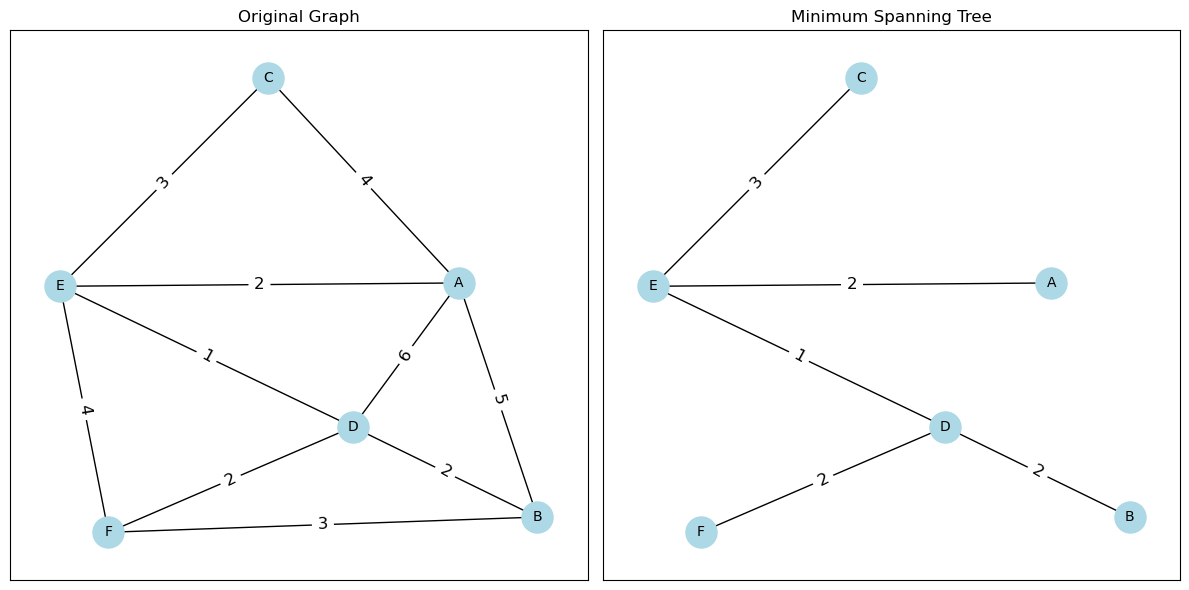

In [75]:
import networkx as nx
import matplotlib.pyplot as plt

def draw_graph(ax, G, pos, title):
    # Get edge labels (weights)
    edge_labels = nx.get_edge_attributes(G, 'weight')

    # Draw the graph
    nx.draw_networkx(G, pos, ax=ax, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    nx.draw_networkx_edge_labels(G, pos, ax=ax, edge_labels=edge_labels, font_size=12)
    
    ax.set_title(title)

# -----------------------------------------------------------------------------------------------------------

# Example edge lists

fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# Create the original graph
G1 = nx.Graph()
G1.add_weighted_edges_from(graph1.edges)

# Create the MST graph
G2 = nx.Graph()
G2.add_weighted_edges_from(MST.edges)

# Use the same positions for both graphs
pos = nx.spring_layout(G1)  # the position of nodes in the graph

# Draw both graphs
draw_graph(axes[0], G1, pos, title="Original Graph")
draw_graph(axes[1], G2, pos, title="Minimum Spanning Tree")

# Show the graph
plt.tight_layout()
plt.show()
